In [1]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Library for visualizing our tree
# If you get an error, run 'conda install python-graphviz' in your terminal
import graphviz



In [2]:
df = pd.read_csv('Project Dataset/Application_Data.csv')
# ['NAME_CONTRACT_STATUS']=df['NAME_CONTRACT_STATUS'].astype(int)
df.head()

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (20,21,22,25,26,27,28,37) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,...,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,1,...,0.018801,-9461.0,-637.0,-3648.0,NaN,1.0,0.0,0.0,Laborers,1.0
1,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,1,...,0.003541,-16765.0,-1188.0,-1186.0,NaN,1.0,0.0,0.0,Core staff,2.0
2,100004,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,1,...,0.010032,-19046.0,-225.0,-4260.0,26.0,1.0,1.0,0.0,Laborers,1.0
3,100006,Revolving loans,13500.000,270000.0,270000.0,NaN,270000.0,THURSDAY,15,1,...,0.008019,-19005.0,-3039.0,-9833.0,NaN,1.0,0.0,0.0,Laborers,2.0
4,100007,Cash loans,16037.640,247500.0,274288.5,NaN,247500.0,MONDAY,11,1,...,0.028663,-19932.0,-3038.0,-4311.0,NaN,1.0,0.0,0.0,Core staff,1.0


In [3]:
# check the shape of the dataset
df.shape

(305828, 39)

In [4]:
# check for null
df.isnull().sum()

SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
AMT_ANNUITY                    47693
AMT_APPLICATION                    0
AMT_CREDIT                         0
AMT_DOWN_PAYMENT              126683
AMT_GOODS_PRICE                50611
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
NFLAG_LAST_APPL_IN_DAY             0
NAME_CASH_LOAN_PURPOSE             0
NAME_CONTRACT_STATUS               0
NAME_PAYMENT_TYPE                  0
NAME_TYPE_SUITE               145006
NAME_CLIENT_TYPE                   0
NAME_GOODS_CATEGORY                0
NAME_SELLER_INDUSTRY               0
CNT_PAYMENT                    47690
NAME_YIELD_GROUP                   0
PRODUCT_COMBINATION               45
CODE_GENDER                    43497
FLAG_OWN_CAR                   43497
FLAG_OWN_REALTY                43497
CNT_CHILDREN                   43497
AMT_INCOME_TOTAL               43497
NAME_INCOME_TYPE               43497
NAME_EDUCATION_TYPE            43497
N

In [5]:
# check how many duplicated row in the dataset
df.duplicated().sum()

0

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


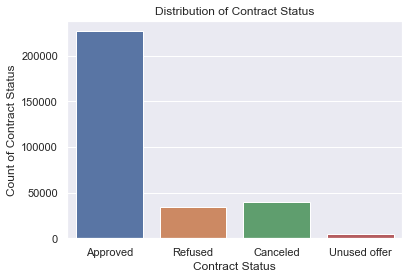

In [6]:
# Use matplotlib to virually shows that the differece between all types of application result
import matplotlib
sns.countplot(df.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [7]:
# drop the cancled loan application cuz it does not make any contribution to our reseach topic
# and mark Approved and Unused offers as approved since they got accepted
# and mark Refused loan as 0
df['NAME_CONTRACT_STATUS']=df['NAME_CONTRACT_STATUS'].replace('Approved', '1')
df['NAME_CONTRACT_STATUS']=df['NAME_CONTRACT_STATUS'].replace('Refused', '0')
df['NAME_CONTRACT_STATUS']=df['NAME_CONTRACT_STATUS'].replace('Unused offer', '1')
df.drop(df[df['NAME_CONTRACT_STATUS'] =='Canceled'].index, inplace = True)


In [8]:
# #since we are not yet interested in the reject reason, drop it for now
# #'NAME_SELLER_INDUSTRY'
# # we are not interested in how approved loan is paid back now, drop it
# df.drop('NAME_PAYMENT_TYPE', axis=1, inplace=True)

# df.drop(['SELLERPLACE_AREA','CNT_PAYMENT','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE'
#         ,'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'], axis=1, inplace=True)

In [9]:
# check if the Canceled loan still exist
df['NAME_CONTRACT_STATUS'].value_counts()

1    231597
0     34784
Name: NAME_CONTRACT_STATUS, dtype: int64

In [10]:
# check the shape of the dataset again, obviously, the canceled data is dropped
df.shape

(266381, 39)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


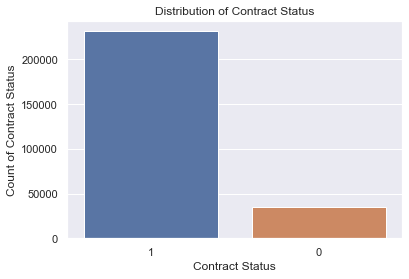

In [11]:
# show the histogram again, we now only have approved abd refused application
sns.countplot(df.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()


In [12]:
# convert text type data into numerical data
# df = pd.get_dummies(df, columns=['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT',
#                                  'NAME_CASH_LOAN_PURPOSE','NAME_TYPE_SUITE','NAME_CLIENT_TYPE',
#                                 'NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE',
#                                 'CHANNEL_TYPE','NAME_YIELD_GROUP','PRODUCT_COMBINATION','NFLAG_INSURED_ON_APPROVAL'], drop_first=True)

In [13]:
#Function to calculate meta-data to identify % of data is missing in each column
def meta_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)

In [14]:
#calculating meta-data for application_data
app_meta_data=meta_data(df)
app_meta_data.head(20)

,Total,Percent,Unique,Data_Type
OWN_CAR_AGE,187570,70.414181,59,float64
OCCUPATION_TYPE,108033,40.555820,18,object
NAME_TYPE_SUITE,106839,40.107590,7,object
AMT_DOWN_PAYMENT,87343,32.788750,13395,float64
CNT_FAM_MEMBERS,36798,13.814048,16,float64
FLAG_OWN_REALTY,36798,13.814048,2,object
FLAG_OWN_CAR,36798,13.814048,2,object
CODE_GENDER,36798,13.814048,3,object
NAME_INCOME_TYPE,36798,13.814048,7,object
NAME_EDUCATION_TYPE,36798,13.814048,5,object


In [15]:
#dropping columns with more than 57% missing values 
#Selected 57% because we don't want to drop EXT_SOURCE_1 which is an important variable
cols_to_keep=list(app_meta_data[(app_meta_data.Percent<57)].index)
application_data=df[cols_to_keep]
application_data.describe()

,AMT_DOWN_PAYMENT,CNT_FAM_MEMBERS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,AMT_INCOME_TOTAL,DAYS_EMPLOYED,DAYS_REGISTRATION,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMAIL,CNT_CHILDREN,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,NFLAG_LAST_APPL_IN_DAY,HOUR_APPR_PROCESS_START,AMT_CREDIT,AMT_APPLICATION,SK_ID_CURR
count,1.790380e+05,229583.000000,229583.000000,229583.000000,2.295830e+05,229583.000000,229583.000000,229583.0,229583.000000,229583.000000,229583.000000,2.538260e+05,256785.000000,256788.000000,266381.000000,266381.000000,2.663810e+05,2.663810e+05,266381.000000
mean,7.073634e+03,2.167238,0.020634,-16004.834369,1.671323e+05,62611.901896,-4979.769412,1.0,0.206304,0.059756,0.428477,1.855394e+05,14384.376894,14.163388,0.997218,12.723115,1.958441e+05,1.767868e+05,278174.280628
std,2.055966e+04,0.917496,0.013479,4345.678978,2.657655e+05,140296.926035,3504.691177,0.0,0.404653,0.237035,0.730701,2.649157e+05,13571.126411,12.356978,0.052669,3.367469,2.840224e+05,2.615638e+05,102841.431933
min,-9.000000e-01,1.000000,0.000290,-25201.000000,2.565000e+04,-17912.000000,-23416.000000,1.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,100001.000000
25%,0.000000e+00,2.000000,0.010006,-19619.000000,1.125000e+05,-2803.000000,-7455.000000,1.0,0.000000,0.000000,0.000000,4.715550e+04,5903.910000,6.000000,1.000000,10.000000,4.629600e+04,4.500000e+04,189218.000000
50%,1.885500e+03,2.000000,0.018850,-15687.000000,1.440000e+05,-1262.000000,-4498.000000,1.0,0.000000,0.000000,0.000000,9.450000e+04,10180.845000,12.000000,1.000000,13.000000,9.735300e+04,9.000000e+04,278259.000000
75%,8.440605e+03,3.000000,0.028663,-12392.000000,2.025000e+05,-316.000000,-2034.000000,1.0,0.000000,0.000000,1.000000,1.914885e+05,17767.890000,18.000000,1.000000,15.000000,2.037600e+05,1.800000e+05,367228.000000
max,2.025000e+06,20.000000,0.072508,-7489.000000,1.170000e+08,365243.000000,0.000000,1.0,1.000000,1.000000,19.000000,6.905160e+06,418058.145000,84.000000,1.000000,23.000000,6.905160e+06,6.905160e+06,456255.000000


In [16]:
#deal with missing AMT_ANNUITY values
df.isnull().sum()

SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
AMT_ANNUITY                     9596
AMT_APPLICATION                    0
AMT_CREDIT                         0
AMT_DOWN_PAYMENT               87343
AMT_GOODS_PRICE                12555
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
NFLAG_LAST_APPL_IN_DAY             0
NAME_CASH_LOAN_PURPOSE             0
NAME_CONTRACT_STATUS               0
NAME_PAYMENT_TYPE                  0
NAME_TYPE_SUITE               106839
NAME_CLIENT_TYPE                   0
NAME_GOODS_CATEGORY                0
NAME_SELLER_INDUSTRY               0
CNT_PAYMENT                     9593
NAME_YIELD_GROUP                   0
PRODUCT_COMBINATION                4
CODE_GENDER                    36798
FLAG_OWN_CAR                   36798
FLAG_OWN_REALTY                36798
CNT_CHILDREN                   36798
AMT_INCOME_TOTAL               36798
NAME_INCOME_TYPE               36798
NAME_EDUCATION_TYPE            36798
N

In [17]:
df["NAME_CONTRACT_STATUS"].value_counts()

1    231597
0     34784
Name: NAME_CONTRACT_STATUS, dtype: int64

In [18]:
# get the average annuity of approved applications and refused applications
average_approved_AMT_ANNUITY=(df[(df['NAME_CONTRACT_STATUS']=='1')])['AMT_ANNUITY'].mean()
average_Refused_ANNUITY=(df[(df['NAME_CONTRACT_STATUS']=='0')])['AMT_ANNUITY'].mean()
print("the average annuity of approved applications is ", average_approved_AMT_ANNUITY)
print("the average annuity of refused applications is ", average_Refused_ANNUITY)

the average annuity of approved applications is  13806.437786144399
the average annuity of refused applications is  18803.78073997385


In [19]:
#it seems like we have to fill something into the null values
#some AMT_ANNUITY is empty, I will replace the the average AMT_ANNUITY based on its NAME_CONTRACT_STATUS

df['AMT_ANNUITY'] = np.where(((df['AMT_ANNUITY'].isnull()==True) & (df['NAME_CONTRACT_STATUS'] == '1') ), average_approved_AMT_ANNUITY,df['AMT_ANNUITY'] )
df['AMT_ANNUITY'] = np.where(((df['AMT_ANNUITY'].isnull()==True) & (df['NAME_CONTRACT_STATUS'] == '0') ), average_Refused_ANNUITY,df['AMT_ANNUITY'] )

In [20]:
df.head(30)
#AMT_ANNUITY data are all filled

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,...,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,100002,Consumer loans,9251.775,179055.000,179055.000,0.000,179055.000,SATURDAY,9,1,...,0.018801,-9461.0,-637.0,-3648.0,NaN,1.0,0.0,0.0,Laborers,1.0
1,100003,Cash loans,98356.995,900000.000,1035882.000,NaN,900000.000,FRIDAY,12,1,...,0.003541,-16765.0,-1188.0,-1186.0,NaN,1.0,0.0,0.0,Core staff,2.0
2,100004,Consumer loans,5357.250,24282.000,20106.000,4860.000,24282.000,FRIDAY,5,1,...,0.010032,-19046.0,-225.0,-4260.0,26.0,1.0,1.0,0.0,Laborers,1.0
3,100006,Revolving loans,13500.000,270000.000,270000.000,NaN,270000.000,THURSDAY,15,1,...,0.008019,-19005.0,-3039.0,-9833.0,NaN,1.0,0.0,0.0,Laborers,2.0
4,100007,Cash loans,16037.640,247500.000,274288.500,NaN,247500.000,MONDAY,11,1,...,0.028663,-19932.0,-3038.0,-4311.0,NaN,1.0,0.0,0.0,Core staff,1.0
5,100008,Consumer loans,8019.090,44455.500,39955.500,4500.000,44455.500,MONDAY,13,1,...,0.035792,-16941.0,-1588.0,-4970.0,NaN,1.0,1.0,0.0,Laborers,2.0
6,100009,Consumer loans,8996.760,98239.500,98239.500,0.000,98239.500,SATURDAY,18,1,...,0.035792,-13778.0,-3130.0,-1213.0,17.0,1.0,0.0,0.0,Accountants,3.0
7,100011,Consumer loans,14614.335,135931.500,134446.500,13594.500,135931.500,MONDAY,17,1,...,0.018634,-20099.0,365243.0,-7427.0,NaN,1.0,0.0,0.0,NaN,2.0
8,100012,Cash loans,11188.035,135000.000,158508.000,NaN,135000.000,FRIDAY,13,1,...,0.019689,-14469.0,-2019.0,-14437.0,NaN,1.0,0.0,0.0,Laborers,1.0
9,100016,Consumer loans,14480.460,290250.000,232200.000,58050.000,290250.000,SATURDAY,14,1,...,0.031329,-13439.0,-2717.0,-311.0,NaN,1.0,1.0,0.0,Laborers,2.0


In [21]:
# delete the row that miss AMT_CREDIT data
df = df.dropna( how='any',subset=['AMT_CREDIT'])
df.isnull().sum()

SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
AMT_ANNUITY                        0
AMT_APPLICATION                    0
AMT_CREDIT                         0
AMT_DOWN_PAYMENT               87343
AMT_GOODS_PRICE                12555
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
NFLAG_LAST_APPL_IN_DAY             0
NAME_CASH_LOAN_PURPOSE             0
NAME_CONTRACT_STATUS               0
NAME_PAYMENT_TYPE                  0
NAME_TYPE_SUITE               106839
NAME_CLIENT_TYPE                   0
NAME_GOODS_CATEGORY                0
NAME_SELLER_INDUSTRY               0
CNT_PAYMENT                     9593
NAME_YIELD_GROUP                   0
PRODUCT_COMBINATION                4
CODE_GENDER                    36798
FLAG_OWN_CAR                   36798
FLAG_OWN_REALTY                36798
CNT_CHILDREN                   36798
AMT_INCOME_TOTAL               36798
NAME_INCOME_TYPE               36798
NAME_EDUCATION_TYPE            36798
N

In [22]:
df['AMT_DOWN_PAYMENT'] = np.where(((df['AMT_DOWN_PAYMENT'].isnull()==True) ), 0,df['AMT_DOWN_PAYMENT'] )

In [23]:
df['OWN_CAR_AGE'] = np.where(((df['OWN_CAR_AGE'].isnull()==True) ), 0,df['OWN_CAR_AGE'] )

In [24]:
df['OCCUPATION_TYPE'] = np.where(((df['OCCUPATION_TYPE'].isnull()==True) ), 'No Specified',df['OWN_CAR_AGE'] )

In [25]:
df['CNT_FAM_MEMBERS'] = np.where(((df['CNT_FAM_MEMBERS'].isnull()==True) ), 'No Specified',df['CNT_FAM_MEMBERS'] )

In [26]:
df.isnull().sum()

SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
AMT_ANNUITY                        0
AMT_APPLICATION                    0
AMT_CREDIT                         0
AMT_DOWN_PAYMENT                   0
AMT_GOODS_PRICE                12555
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
NFLAG_LAST_APPL_IN_DAY             0
NAME_CASH_LOAN_PURPOSE             0
NAME_CONTRACT_STATUS               0
NAME_PAYMENT_TYPE                  0
NAME_TYPE_SUITE               106839
NAME_CLIENT_TYPE                   0
NAME_GOODS_CATEGORY                0
NAME_SELLER_INDUSTRY               0
CNT_PAYMENT                     9593
NAME_YIELD_GROUP                   0
PRODUCT_COMBINATION                4
CODE_GENDER                    36798
FLAG_OWN_CAR                   36798
FLAG_OWN_REALTY                36798
CNT_CHILDREN                   36798
AMT_INCOME_TOTAL               36798
NAME_INCOME_TYPE               36798
NAME_EDUCATION_TYPE            36798
N

In [27]:
df.shape

(266381, 39)

In [28]:
df = df.dropna( how='any',subset=['CODE_GENDER'])

In [29]:
df = df.dropna( how='any',subset=['AMT_GOODS_PRICE'])

In [30]:
df = df.dropna( how='any',subset=['CNT_PAYMENT'])

In [31]:
df.isnull().sum()

SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
AMT_ANNUITY                       0
AMT_APPLICATION                   0
AMT_CREDIT                        0
AMT_DOWN_PAYMENT                  0
AMT_GOODS_PRICE                   0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
NFLAG_LAST_APPL_IN_DAY            0
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
NAME_PAYMENT_TYPE                 0
NAME_TYPE_SUITE               77617
NAME_CLIENT_TYPE                  0
NAME_GOODS_CATEGORY               0
NAME_SELLER_INDUSTRY              0
CNT_PAYMENT                       0
NAME_YIELD_GROUP                  0
PRODUCT_COMBINATION               0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS          

In [32]:
df['NAME_TYPE_SUITE'] = np.where(((df['NAME_TYPE_SUITE'].isnull()==True) ), 'No Specified',df['NAME_TYPE_SUITE'] )

In [33]:
# # make missing downpayments to zero
# #delete
# df['AMT_DOWN_PAYMENT'] = np.where(((df['AMT_DOWN_PAYMENT'].isnull()==True)), 0,df['AMT_DOWN_PAYMENT'])
# df.isnull().sum()

In [34]:
#client might not tell the goods' price, so just keep missing AMT_GOODS_PRICE values empty 

In [35]:
# #make missing RATE_DOWN_PAYMENT to zero since the AMT_DOWN_PAYMENT is zero
# df['AMT_DOWN_PAYMENT'] = np.where(((df['RATE_DOWN_PAYMENT'].isnull()==True)), 0,df['RATE_DOWN_PAYMENT'])
# df.isnull().sum()
# df=df.drop(['AMT_DOWN_PAYMENT','AMT_DOWN_PAYMENT'],1)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


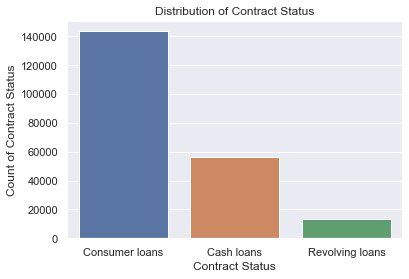

In [36]:
# how many types of loan types?
sns.countplot(df.NAME_CONTRACT_TYPE)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [37]:
# delete rows which has missing NAME_TYPE_SUITE and NFLAG_INSURED_ON_APPROVAL
# missing NAME_TYPE_SUITE means the borrower does not tell Who accompanied client when 
# applying for the loan application, and missing NFLAG_INSURED_ON_APPROVAL means borrower does
# not say about weather he requested insurance during the loan application
df.dropna(subset=['NAME_TYPE_SUITE','AMT_GOODS_PRICE'],inplace=True)
df.isnull().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
AMT_ANNUITY                   0
AMT_APPLICATION               0
AMT_CREDIT                    0
AMT_DOWN_PAYMENT              0
AMT_GOODS_PRICE               0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
NFLAG_LAST_APPL_IN_DAY        0
NAME_CASH_LOAN_PURPOSE        0
NAME_CONTRACT_STATUS          0
NAME_PAYMENT_TYPE             0
NAME_TYPE_SUITE               0
NAME_CLIENT_TYPE              0
NAME_GOODS_CATEGORY           0
NAME_SELLER_INDUSTRY          0
CNT_PAYMENT                   0
NAME_YIELD_GROUP              0
PRODUCT_COMBINATION           0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMP

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


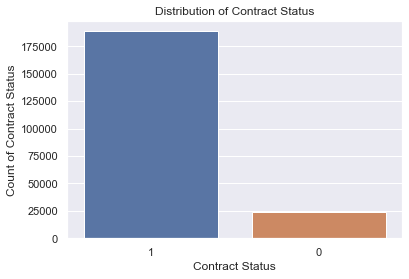

In [38]:
sns.countplot(df.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()


In [39]:
# get the total amount of approved and refused applications
approved=df[df.NAME_CONTRACT_STATUS=='1']
refused=df[df.NAME_CONTRACT_STATUS=='0']

In [40]:
#get the percentage
percentage_approved=(len(approved)*100)/len(df)
percentage_refused=(len(refused)*100)/len(df)
print("The Percentage of people whose loans have been Approved is:",round(percentage_approved,3),"%")
print("The Percentage of people whose loans have been Refused is:",round(percentage_refused,3),"%")

The Percentage of people whose loans have been Approved is: 88.542 %
The Percentage of people whose loans have been Refused is: 11.458 %


In [41]:
#build a function to disaply the numbers of value in a column sorted by refused and approved 
#applications
def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,30))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    plt.show()

In [42]:
df.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

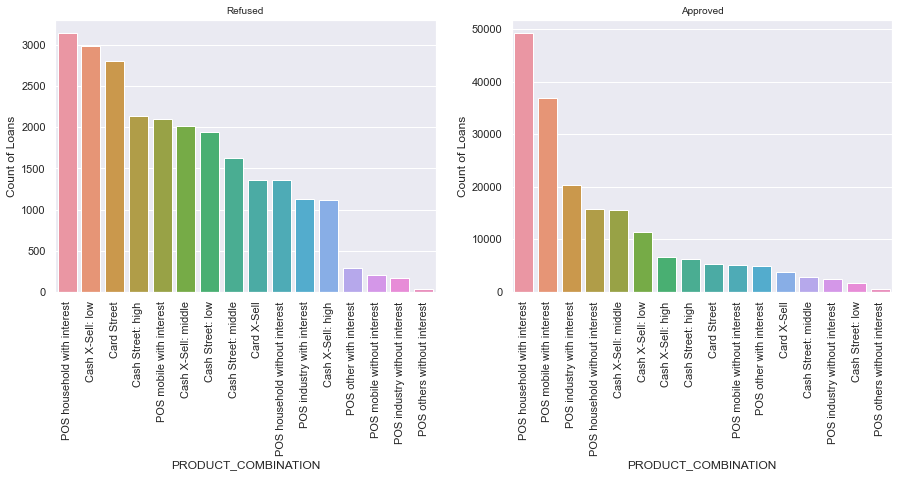

In [43]:
plot_charts('PRODUCT_COMBINATION', label_rotation=True,horizontal_layout=True)
#we can see that most applications got refused because those borrows just ask for cash
#and most approved application is for mortgage and mobile

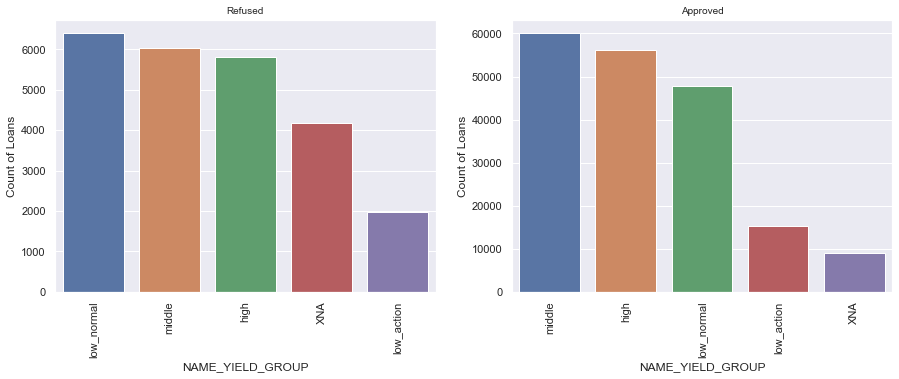

In [44]:
plot_charts('NAME_YIELD_GROUP', label_rotation=True,horizontal_layout=True)
#we can see low interest rate application is likely to get refused.

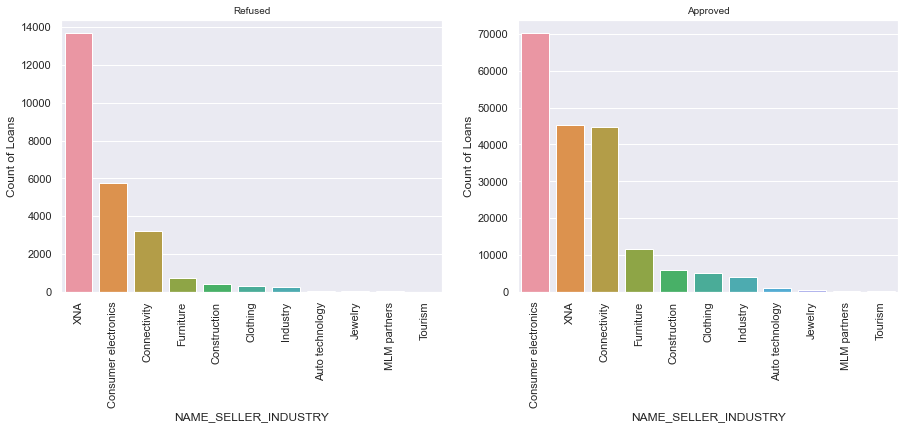

In [45]:
plot_charts('NAME_SELLER_INDUSTRY', label_rotation=True,horizontal_layout=True)

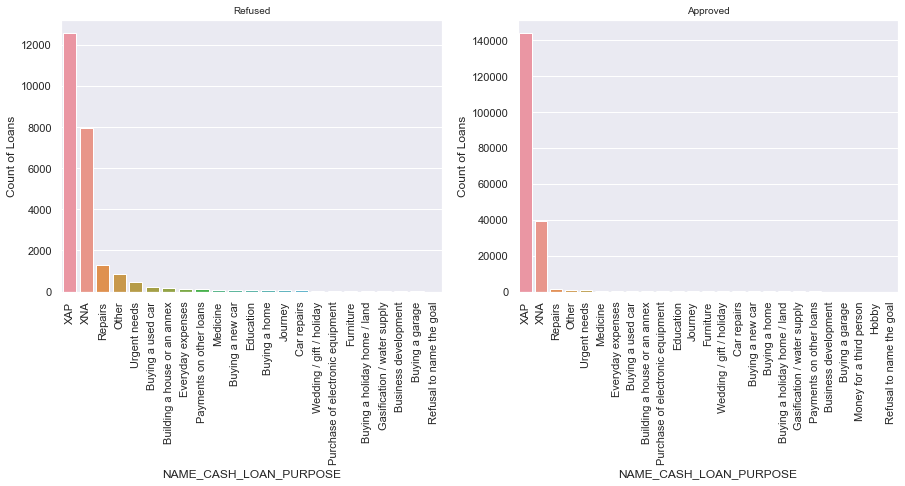

In [46]:
plot_charts('NAME_CASH_LOAN_PURPOSE', label_rotation=True,horizontal_layout=True)

In [47]:
#sns.pairplot(df, hue='NAME_CONTRACT_STATUS');

In [48]:
# #drop interest rate column since most of them are missing
# df = df.drop('RATE_INTEREST_PRIMARY', 1)
# df = df.drop('RATE_INTEREST_PRIVILEGED', 1)
# df = df.drop('SK_ID_PREV', 1)
df = df.drop('SK_ID_CURR', 1)
df.isnull().sum()

NAME_CONTRACT_TYPE            0
AMT_ANNUITY                   0
AMT_APPLICATION               0
AMT_CREDIT                    0
AMT_DOWN_PAYMENT              0
AMT_GOODS_PRICE               0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
NFLAG_LAST_APPL_IN_DAY        0
NAME_CASH_LOAN_PURPOSE        0
NAME_CONTRACT_STATUS          0
NAME_PAYMENT_TYPE             0
NAME_TYPE_SUITE               0
NAME_CLIENT_TYPE              0
NAME_GOODS_CATEGORY           0
NAME_SELLER_INDUSTRY          0
CNT_PAYMENT                   0
NAME_YIELD_GROUP              0
PRODUCT_COMBINATION           0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REG

In [49]:
df=df.drop(['NFLAG_LAST_APPL_IN_DAY','NFLAG_LAST_APPL_IN_DAY'],1)

In [50]:
df=df.drop(['NAME_YIELD_GROUP','NAME_YIELD_GROUP'],1)

In [51]:
df=df.drop(['PRODUCT_COMBINATION','PRODUCT_COMBINATION'],1)

In [52]:
df=df.drop(['NAME_CASH_LOAN_PURPOSE','NAME_CASH_LOAN_PURPOSE'],1)

In [53]:
df=df.drop(['NAME_PAYMENT_TYPE','NAME_PAYMENT_TYPE'],1)

In [54]:
df=df.drop(['REGION_POPULATION_RELATIVE','REGION_POPULATION_RELATIVE'],1)

In [69]:
df=df.drop(['OCCUPATION_TYPE','OCCUPATION_TYPE'],1)

In [70]:
df.isnull().sum()

NAME_CONTRACT_TYPE            0
AMT_ANNUITY                   0
AMT_APPLICATION               0
AMT_CREDIT                    0
AMT_DOWN_PAYMENT              0
AMT_GOODS_PRICE               0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
NAME_CONTRACT_STATUS          0
NAME_TYPE_SUITE               0
NAME_CLIENT_TYPE              0
NAME_GOODS_CATEGORY           0
NAME_SELLER_INDUSTRY          0
CNT_PAYMENT                   0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
OWN_CAR_AGE                   0
FLAG_MOBIL                    0
FLAG_WORK_PHONE               0
FLAG_EMAIL                    0
CNT_FAM_MEMBERS               0
dtype: i

In [71]:
df.head()

,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_CONTRACT_STATUS,NAME_TYPE_SUITE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,OWN_CAR_AGE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,1,No Specified,...,Single / not married,House / apartment,-9461.0,-637.0,-3648.0,0.0,1.0,0.0,0.0,1.0
1,Cash loans,98356.995,900000.0,1035882.0,0.0,900000.0,FRIDAY,12,1,Unaccompanied,...,Married,House / apartment,-16765.0,-1188.0,-1186.0,0.0,1.0,0.0,0.0,2.0
2,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,1,Unaccompanied,...,Single / not married,House / apartment,-19046.0,-225.0,-4260.0,26.0,1.0,1.0,0.0,1.0
3,Revolving loans,13500.000,270000.0,270000.0,0.0,270000.0,THURSDAY,15,1,Unaccompanied,...,Civil marriage,House / apartment,-19005.0,-3039.0,-9833.0,0.0,1.0,0.0,0.0,2.0
4,Cash loans,16037.640,247500.0,274288.5,0.0,247500.0,MONDAY,11,1,No Specified,...,Single / not married,House / apartment,-19932.0,-3038.0,-4311.0,0.0,1.0,0.0,0.0,1.0


In [72]:
df['CODE_GENDER'] = np.where(((df['CODE_GENDER']=='M') ), '1','0')

In [73]:
df['FLAG_OWN_CAR'] = np.where(((df['FLAG_OWN_CAR']=='Y') ), '1','0')

In [74]:
df['FLAG_OWN_REALTY'] = np.where(((df['FLAG_OWN_REALTY']=='Y') ), '1','0')

In [75]:
df['NAME_INCOME_TYPE'].value_counts()

Working                 111768
Commercial associate     47546
Pensioner                38447
State servant            15253
Unemployed                  15
Student                     10
Maternity leave              2
Name: NAME_INCOME_TYPE, dtype: int64

In [76]:
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    153994
Higher education                  49137
Incomplete higher                  7033
Lower secondary                    2754
Academic degree                     123
Name: NAME_EDUCATION_TYPE, dtype: int64

In [77]:
df['NAME_FAMILY_STATUS'].value_counts()

Married                 136482
Single / not married     30414
Civil marriage           20912
Separated                13787
Widow                    11446
Name: NAME_FAMILY_STATUS, dtype: int64

In [78]:
df['NAME_HOUSING_TYPE'].value_counts()

House / apartment      188823
With parents            10262
Municipal apartment      7939
Rented apartment         3428
Office apartment         1848
Co-op apartment           741
Name: NAME_HOUSING_TYPE, dtype: int64

In [80]:
df = pd.get_dummies(df, columns=['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_TYPE_SUITE',
                                'NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_SELLER_INDUSTRY','NAME_INCOME_TYPE',
                                 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'
                                ], drop_first=True)

In [82]:
for col_name in df.columns: 
    print(f"'{col_name}',")

'AMT_ANNUITY',
'AMT_APPLICATION',
'AMT_CREDIT',
'AMT_DOWN_PAYMENT',
'AMT_GOODS_PRICE',
'HOUR_APPR_PROCESS_START',
'NAME_CONTRACT_STATUS',
'CNT_PAYMENT',
'CODE_GENDER',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'DAYS_REGISTRATION',
'OWN_CAR_AGE',
'FLAG_MOBIL',
'FLAG_WORK_PHONE',
'FLAG_EMAIL',
'CNT_FAM_MEMBERS',
'NAME_CONTRACT_TYPE_Consumer loans',
'NAME_CONTRACT_TYPE_Revolving loans',
'WEEKDAY_APPR_PROCESS_START_MONDAY',
'WEEKDAY_APPR_PROCESS_START_SATURDAY',
'WEEKDAY_APPR_PROCESS_START_SUNDAY',
'WEEKDAY_APPR_PROCESS_START_THURSDAY',
'WEEKDAY_APPR_PROCESS_START_TUESDAY',
'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
'NAME_TYPE_SUITE_Family',
'NAME_TYPE_SUITE_Group of people',
'NAME_TYPE_SUITE_No Specified',
'NAME_TYPE_SUITE_Other_A',
'NAME_TYPE_SUITE_Other_B',
'NAME_TYPE_SUITE_Spouse, partner',
'NAME_TYPE_SUITE_Unaccompanied',
'NAME_CLIENT_TYPE_Refreshed',
'NAME_CLIENT_TYPE_Repeater',
'NAME_CLIENT_TYPE_XNA',
'NAME_GOODS_CATEGORY_Anim

In [83]:
#prepare datas for build
selected_features = ['AMT_ANNUITY',
'AMT_APPLICATION',
'AMT_CREDIT',
'AMT_DOWN_PAYMENT',
'AMT_GOODS_PRICE',
'HOUR_APPR_PROCESS_START',
'CNT_PAYMENT',
'CODE_GENDER',
'FLAG_OWN_CAR',
'FLAG_OWN_REALTY',
'CNT_CHILDREN',
'AMT_INCOME_TOTAL',
'DAYS_BIRTH',
'DAYS_EMPLOYED',
'DAYS_REGISTRATION',
'OWN_CAR_AGE',
'FLAG_MOBIL',
'FLAG_WORK_PHONE',
'FLAG_EMAIL',
'CNT_FAM_MEMBERS',
'NAME_CONTRACT_TYPE_Consumer loans',
'NAME_CONTRACT_TYPE_Revolving loans',
'WEEKDAY_APPR_PROCESS_START_MONDAY',
'WEEKDAY_APPR_PROCESS_START_SATURDAY',
'WEEKDAY_APPR_PROCESS_START_SUNDAY',
'WEEKDAY_APPR_PROCESS_START_THURSDAY',
'WEEKDAY_APPR_PROCESS_START_TUESDAY',
'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
'NAME_TYPE_SUITE_Family',
'NAME_TYPE_SUITE_Group of people',
'NAME_TYPE_SUITE_No Specified',
'NAME_TYPE_SUITE_Other_A',
'NAME_TYPE_SUITE_Other_B',
'NAME_TYPE_SUITE_Spouse, partner',
'NAME_TYPE_SUITE_Unaccompanied',
'NAME_CLIENT_TYPE_Refreshed',
'NAME_CLIENT_TYPE_Repeater',
'NAME_CLIENT_TYPE_XNA',
'NAME_GOODS_CATEGORY_Animals',
'NAME_GOODS_CATEGORY_Audio/Video',
'NAME_GOODS_CATEGORY_Auto Accessories',
'NAME_GOODS_CATEGORY_Clothing and Accessories',
'NAME_GOODS_CATEGORY_Computers',
'NAME_GOODS_CATEGORY_Construction Materials',
'NAME_GOODS_CATEGORY_Consumer Electronics',
'NAME_GOODS_CATEGORY_Direct Sales',
'NAME_GOODS_CATEGORY_Education',
'NAME_GOODS_CATEGORY_Fitness',
'NAME_GOODS_CATEGORY_Furniture',
'NAME_GOODS_CATEGORY_Gardening',
'NAME_GOODS_CATEGORY_Homewares',
'NAME_GOODS_CATEGORY_Insurance',
'NAME_GOODS_CATEGORY_Jewelry',
'NAME_GOODS_CATEGORY_Medical Supplies',
'NAME_GOODS_CATEGORY_Medicine',
'NAME_GOODS_CATEGORY_Mobile',
'NAME_GOODS_CATEGORY_Office Appliances',
'NAME_GOODS_CATEGORY_Other',
'NAME_GOODS_CATEGORY_Photo / Cinema Equipment',
'NAME_GOODS_CATEGORY_Sport and Leisure',
'NAME_GOODS_CATEGORY_Tourism',
'NAME_GOODS_CATEGORY_Vehicles',
'NAME_GOODS_CATEGORY_Weapon',
'NAME_GOODS_CATEGORY_XNA',
'NAME_SELLER_INDUSTRY_Clothing',
'NAME_SELLER_INDUSTRY_Connectivity',
'NAME_SELLER_INDUSTRY_Construction',
'NAME_SELLER_INDUSTRY_Consumer electronics',
'NAME_SELLER_INDUSTRY_Furniture',
'NAME_SELLER_INDUSTRY_Industry',
'NAME_SELLER_INDUSTRY_Jewelry',
'NAME_SELLER_INDUSTRY_MLM partners',
'NAME_SELLER_INDUSTRY_Tourism',
'NAME_SELLER_INDUSTRY_XNA',
'NAME_INCOME_TYPE_Maternity leave',
'NAME_INCOME_TYPE_Pensioner',
'NAME_INCOME_TYPE_State servant',
'NAME_INCOME_TYPE_Student',
'NAME_INCOME_TYPE_Unemployed',
'NAME_INCOME_TYPE_Working',
'NAME_EDUCATION_TYPE_Higher education',
'NAME_EDUCATION_TYPE_Incomplete higher',
'NAME_EDUCATION_TYPE_Lower secondary',
'NAME_EDUCATION_TYPE_Secondary / secondary special',
'NAME_FAMILY_STATUS_Married',
'NAME_FAMILY_STATUS_Separated',
'NAME_FAMILY_STATUS_Single / not married',
'NAME_FAMILY_STATUS_Widow',
'NAME_HOUSING_TYPE_House / apartment',
'NAME_HOUSING_TYPE_Municipal apartment',
'NAME_HOUSING_TYPE_Office apartment',
'NAME_HOUSING_TYPE_Rented apartment',
'NAME_HOUSING_TYPE_With parents']

X = df[selected_features]
y = df['NAME_CONTRACT_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
print('Lenght of our Training data:', X_train.shape, '\nLength of our Testing data:', y_test.shape)

Lenght of our Training data: (170432, 93) 
Length of our Testing data: (42609,)


In [84]:
df['NAME_CONTRACT_STATUS'].value_counts()

1    188630
0     24411
Name: NAME_CONTRACT_STATUS, dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213041 entries, 0 to 262330
Data columns (total 94 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   AMT_ANNUITY                                        213041 non-null  float64
 1   AMT_APPLICATION                                    213041 non-null  float64
 2   AMT_CREDIT                                         213041 non-null  float64
 3   AMT_DOWN_PAYMENT                                   213041 non-null  float64
 4   AMT_GOODS_PRICE                                    213041 non-null  float64
 5   HOUR_APPR_PROCESS_START                            213041 non-null  int64  
 6   NAME_CONTRACT_STATUS                               213041 non-null  object 
 7   CNT_PAYMENT                                        213041 non-null  float64
 8   CODE_GENDER                                        213041 non-null  object

In [86]:
y_train.value_counts()

1    150834
0     19598
Name: NAME_CONTRACT_STATUS, dtype: int64

In [87]:
y_train.isna().sum()


0

In [88]:
df.head(50)

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NAME_CONTRACT_STATUS,CNT_PAYMENT,CODE_GENDER,FLAG_OWN_CAR,...,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,9251.775,179055.000,179055.000,0.000,179055.000,9,1,24.0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,98356.995,900000.000,1035882.000,0.000,900000.000,12,1,12.0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,5357.250,24282.000,20106.000,4860.000,24282.000,5,1,4.0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,13500.000,270000.000,270000.000,0.000,270000.000,15,1,0.0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,16037.640,247500.000,274288.500,0.000,247500.000,11,1,24.0,0,0,...,1,0,0,1,0,1,0,0,0,0
5,8019.090,44455.500,39955.500,4500.000,44455.500,13,1,6.0,0,0,...,1,1,0,0,0,1,0,0,0,0
6,8996.760,98239.500,98239.500,0.000,98239.500,18,1,12.0,0,0,...,0,1,0,0,0,1,0,0,0,0
7,14614.335,135931.500,134446.500,13594.500,135931.500,17,1,12.0,0,0,...,1,1,0,0,0,1,0,0,0,0
8,11188.035,135000.000,158508.000,0.000,135000.000,13,1,24.0,0,0,...,1,0,0,1,0,1,0,0,0,0
9,14480.460,290250.000,232200.000,58050.000,290250.000,14,1,24.0,0,0,...,1,1,0,0,0,1,0,0,0,0


In [94]:
from sklearn.tree import DecisionTreeClassifier 


model = DecisionTreeClassifier(max_depth=9)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred,pos_label='1')
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred, pos_label='1')
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred,pos_label='1')
print('F1 Score: %f' % f1)


# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# # Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# # Compute auc score
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)

print('AUC Score: %f' % auc)

Accuracy Score: 0.895844
Precision Score: 0.901594
Recall Score: 0.990713
F1 Score: 0.944055
AUC Score: 0.808508


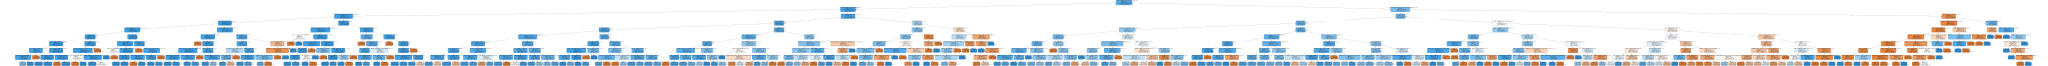

In [95]:
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=selected_features,
                     class_names=['Approved','refused'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph



In [96]:

# Now lets look at our feature importances
my_dict = {'feature_importance': model.feature_importances_,
           'feature':selected_features }
feature_imp = pd.DataFrame.from_dict( my_dict ).sort_values('feature_importance', ascending=False)
feature_imp
# 


,feature_importance,feature
63,0.373675,NAME_GOODS_CATEGORY_XNA
6,0.175052,CNT_PAYMENT
20,0.122559,NAME_CONTRACT_TYPE_Consumer loans
36,0.094175,NAME_CLIENT_TYPE_Repeater
12,0.034311,DAYS_BIRTH
...,...,...
60,0.000000,NAME_GOODS_CATEGORY_Tourism
61,0.000000,NAME_GOODS_CATEGORY_Vehicles
62,0.000000,NAME_GOODS_CATEGORY_Weapon
18,0.000000,FLAG_EMAIL


In [97]:
# Initialize an empty Random Forest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred, pos_label='1')
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred, pos_label='1')
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label='1')
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)



Accuracy Score: 0.895961
Precision Score: 0.901741
Recall Score: 0.990660
F1 Score: 0.944112
AUC Score: 0.808826


In [98]:
df.isnull().sum()

AMT_ANNUITY                              0
AMT_APPLICATION                          0
AMT_CREDIT                               0
AMT_DOWN_PAYMENT                         0
AMT_GOODS_PRICE                          0
                                        ..
NAME_HOUSING_TYPE_House / apartment      0
NAME_HOUSING_TYPE_Municipal apartment    0
NAME_HOUSING_TYPE_Office apartment       0
NAME_HOUSING_TYPE_Rented apartment       0
NAME_HOUSING_TYPE_With parents           0
Length: 94, dtype: int64

In [ ]:

params = {
    'n_estimators' : [5, 10, 50, 100],
    'criterion' : ['gini', 'entropy'],
    'max_depth': [5, 10, 20], 
    'min_samples_split': [2, 10, 100],
    'max_features': [2, 4, 'auto']
}

grid_search_cv = GridSearchCV( 
    estimator=RandomForestClassifier(), 
    param_grid=params,
    scoring='f1', )


# Now, with one easy command, fit all combination of trees. 
grid_search_cv.fit(X_train, y_train)


# Print the best parameters it found
print(grid_search_cv.best_params_)


# This command gives you model that has the highest f1-score. 
model = grid_search_cv.best_estimator_

# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred, pos_label='1')
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred, pos_label='1')
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label='1')
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)



E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py", line 1068, in f1_score
    return fbeta_score(y_true, y_pred, beta=1, labels=labels,
  File "E:\Anaconda\lib\site-packages\skl

In [ ]:
# predicting the loan amount range
# will have delete the refused data, and delete the application_result column
# and treat loan_amount as our new y data
df.head(30)

In [ ]:
# drop refused data
df.drop(df[df['NAME_CONTRACT_STATUS']=='Refused'].index, inplace = True)

In [ ]:
# delete NAME_CONTRACT_STATUS column
df = df.drop('NAME_CONTRACT_STATUS', 1)

In [ ]:
pd.set_option('display.max_columns', None)
df.head(100)

In [ ]:
df['AMT_CREDIT'].value_counts()

In [ ]:

# Now lets look at our feature importances
my_dict = {'feature_importance': model.feature_importances_,
           'feature':selected_features }
feature_imp = pd.DataFrame.from_dict( my_dict ).sort_values('feature_importance', ascending=False)
feature_imp

In [ ]:
import scipy.stats as stats

original_cols = df.columns

target_cols = ['AMT_ANNUITY',
'AMT_APPLICATION',
'AMT_GOODS_PRICE',
'HOUR_APPR_PROCESS_START',
'NFLAG_LAST_APPL_IN_DAY',
'DAYS_DECISION',
'NAME_CONTRACT_TYPE_Consumer loans',
'NAME_CONTRACT_TYPE_Revolving loans']

z_score_cols = []

# Loop through our target columns
for col in target_cols:
    # Make the new column name the same as the original but with 'z_score' added to it
    new_col_name = col + "_zscore"
    
    # Set the new column equal to the score
    df[new_col_name] = stats.stats.zscore( df[col] )
    
    # Set the z-score to its absolute value of the for easier filtering
    df[new_col_name] = abs( df[new_col_name] )
    
    # Append the new column name our our z_score_cols list for easier access for later.
    z_score_cols.append(new_col_name)


condition = df[z_score_cols] < 3
print(df.shape)

# # Say TRUE only if all of the rows are True, else return False
condition = condition.all(axis=1)

print('Before removal of outliers', df.shape)

df = df[condition]

print('After removal of outliers', df.shape)



In [ ]:
df = df[original_cols]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train, y_train)

# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred, pos_label='1')
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred, pos_label='1')
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred, pos_label='1')
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)